In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, precision_score, f1_score, log_loss
from sklearn.metrics import classification_report,confusion_matrix, precision_recall_fscore_support 
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [3]:
df=pd.read_csv('kidney_disease.csv')

In [4]:
df.head()


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
id                400 non-null int64
age               391 non-null float64
bp                388 non-null float64
sg                353 non-null float64
al                354 non-null float64
su                351 non-null float64
rbc               248 non-null object
pc                335 non-null object
pcc               396 non-null object
ba                396 non-null object
bgr               356 non-null float64
bu                381 non-null float64
sc                383 non-null float64
sod               313 non-null float64
pot               312 non-null float64
hemo              348 non-null float64
pcv               330 non-null object
wc                295 non-null object
rc                270 non-null object
htn               398 non-null object
dm                398 non-null object
cad               398 non-null object
appet             399 non-null object
pe         

In [6]:
# To see what are the column names in our dataset
print(df.columns)


Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')


In [7]:
#cleaning
df[['htn','dm','cad','pe','ane']] = df[['htn','dm','cad','pe','ane']].replace(to_replace={'yes':1,'no':0})
df[['rbc','pc']] = df[['rbc','pc']].replace(to_replace={'abnormal':1,'normal':0})
df[['pcc','ba']] = df[['pcc','ba']].replace(to_replace={'present':1,'notpresent':0})
df[['appet']] = df[['appet']].replace(to_replace={'good':1,'poor':0,'no':np.nan})
df['classification'] = df['classification'].replace(to_replace={'ckd':1.0,'ckd\t':1.0,'notckd':0.0,'no':0.0})
df.rename(columns={'classification':'class'},inplace=True)


In [8]:
# Further cleaning
df['pe'] = df['pe'].replace(to_replace='good',value=0) # Not having pedal edema is good
df['appet'] = df['appet'].replace(to_replace='no',value=0)
df['cad'] = df['cad'].replace(to_replace='\tno',value=0)
df['dm'] = df['dm'].replace(to_replace={'\tno':0,'\tyes':1,' yes':1, '':np.nan})
df.drop('id',axis=1,inplace=True)


df = df.replace("?", np.nan)
df = df.replace("	?", np.nan)
df = df.fillna(method='ffill')
df = df.fillna(method='backfill')
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,0.0,0.0,0.0,0.0,121.0,...,44,7800,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,7.0,50.0,1.020,4.0,0.0,0.0,0.0,0.0,0.0,121.0,...,38,6000,5.2,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.0,...,31,7500,5.2,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,...,32,6700,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1.0
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.0,...,35,7300,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1.0


AxesSubplot(0.125,0.125;0.775x0.755)


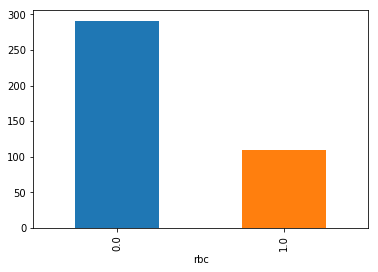

In [10]:
# Counting number of normal vs. abnormal red blood cells of people having chronic kidney disease
print(df.groupby('rbc').rbc.count().plot(kind="bar"))


In [11]:
df = df.dropna(axis=0)
df['class'].value_counts()

1.0    250
0.0    150
Name: class, dtype: int64

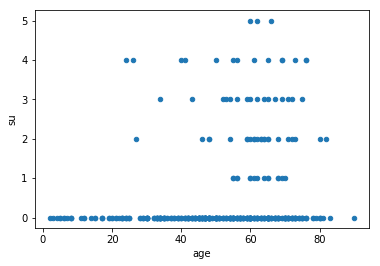

In [15]:
#This plot shows the patient's sugar level compared to their ages
df.plot(kind='scatter', x='age',y='su');
plt.show()


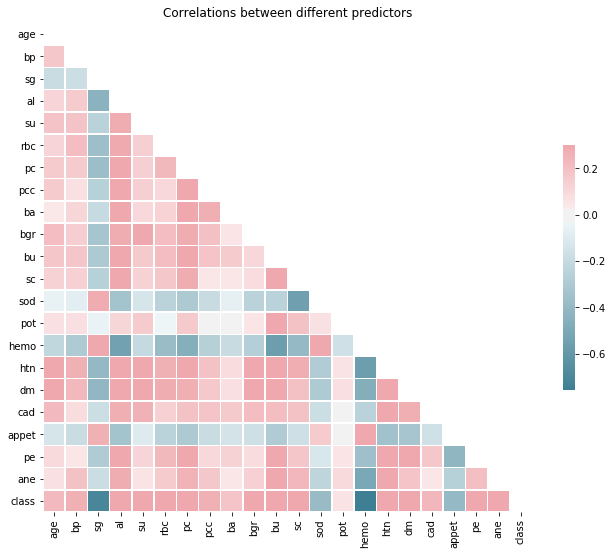

In [12]:
corr_df = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_df, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlations between different predictors')
plt.show()


In [13]:
X = df.drop("class", axis=1)
y = df["class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
classifiers = [
    KNeighborsClassifier(5),
    SVC(C=.1, degree=1, kernel='poly', probability=True),
    NuSVC(nu=.1, degree=1, kernel='poly', probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    LogisticRegression()]

# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", 'Log Loss']
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    try:
        print('****Results****')
        train_predictions = clf.predict(X_test)
        acc = accuracy_score(y_test, train_predictions)
        print("Accuracy: {:.4%}".format(acc))
#         print("accuracy_score: \n",accuracy_score(y_test, train_predictions))
        print("precision_score: \n",precision_score(y_test, train_predictions))
        print("f1_score: \n",f1_score(y_test, train_predictions))
#         print("classification_report: \n",classification_report(y_test, train_predictions))
        print("confusion_matrix: \n",confusion_matrix(y_test, train_predictions))
        print("log_loss: \n",log_loss(y_test, train_predictions))
        log_entry = pd.DataFrame([[name, acc*100, log_loss(y_test, train_predictions)]], columns=log_cols)
        log = log.append(log_entry)
    except Exception as e:
        print (e)
    
print("="*30)


KNeighborsClassifier
****Results****
Accuracy: 71.2500%
precision_score: 
 0.8536585365853658
f1_score: 
 0.7526881720430108
confusion_matrix: 
 [[22  6]
 [17 35]]
log_loss: 
 9.929958183344088


C:\Users\shirahatti\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC
****Results****
Accuracy: 97.5000%
precision_score: 
 0.9807692307692307
f1_score: 
 0.9807692307692307
confusion_matrix: 
 [[27  1]
 [ 1 51]]
log_loss: 
 0.8634794048406453


C:\Users\shirahatti\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


NuSVC
****Results****
Accuracy: 97.5000%
precision_score: 
 0.9807692307692307
f1_score: 
 0.9807692307692307
confusion_matrix: 
 [[27  1]
 [ 1 51]]
log_loss: 
 0.8634794048406453
DecisionTreeClassifier
****Results****
Accuracy: 98.7500%
precision_score: 
 1.0
f1_score: 
 0.9902912621359222
confusion_matrix: 
 [[28  0]
 [ 1 51]]
log_loss: 
 0.43173470493638444
RandomForestClassifier
****Results****
Accuracy: 100.0000%
precision_score: 
 1.0
f1_score: 
 1.0
confusion_matrix: 
 [[28  0]
 [ 0 52]]
log_loss: 
 9.992007221626413e-16


C:\Users\shirahatti\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


AdaBoostClassifier
****Results****
Accuracy: 98.7500%
precision_score: 
 1.0
f1_score: 
 0.9902912621359222
confusion_matrix: 
 [[28  0]
 [ 1 51]]
log_loss: 
 0.43173470493638444
GradientBoostingClassifier
****Results****
Accuracy: 98.7500%
precision_score: 
 1.0
f1_score: 
 0.9902912621359222
confusion_matrix: 
 [[28  0]
 [ 1 51]]
log_loss: 
 0.43173470493638444
GaussianNB
****Results****
Accuracy: 100.0000%
precision_score: 
 1.0
f1_score: 
 1.0
confusion_matrix: 
 [[28  0]
 [ 0 52]]
log_loss: 
 9.992007221626413e-16
LinearDiscriminantAnalysis
****Results****
Accuracy: 97.5000%
precision_score: 
 1.0
f1_score: 
 0.9803921568627451
confusion_matrix: 
 [[28  0]
 [ 2 50]]
log_loss: 
 0.863469409872768
LogisticRegression
****Results****
Accuracy: 97.5000%
precision_score: 
 0.9807692307692307
f1_score: 
 0.9807692307692307
confusion_matrix: 
 [[27  1]
 [ 1 51]]
log_loss: 
 0.8634794048406453


C:\Users\shirahatti\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [10]:
# ANN


In [17]:
from keras.models import Sequential  #to initialize the neural network
from keras.layers import Dense  # to build the layers of ANN
from keras.layers import Dropout


Using TensorFlow backend.


In [18]:
import warnings
warnings.filterwarnings('ignore')
# Initialising the ANN
classifier = Sequential()
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 128,  kernel_initializer ='uniform', activation = 'relu', input_dim = 24))
classifier.add(Dropout(0.2))
# Adding the second hidden layer
classifier.add(Dense(units = 64, kernel_initializer ='uniform', activation = 'relu'))
# Adding the output layer
classifier.add(Dense(units=1, kernel_initializer = 'uniform', activation = 'softmax'))
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
# Fitting the ANN to the Training set
model = classifier.fit(X_train, y_train,  validation_data=(X_test, y_test), batch_size = 5, nb_epoch = 5)


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 320 samples, validate on 80 samples
Epoch 1/5
320/320 [==============================] - 2s 8ms/step - loss: 6.0780 - accuracy: 0.6187 - val_loss: 5.5798 - val_accuracy: 0.6500
Epoch 2/5
320/320 [==============================] - 0s 650us/step - loss: 6.0780 - accuracy: 0.6187 - val_loss: 5.5798 - val_accuracy: 0.6500
Epoch 3/5
320/320 [==============================] - 0s 629us/step - loss: 6.0780 - accuracy: 0.6187 - val_loss: 5.5798 - val_accuracy: 0.6500
Epoch 4/5
320/320 [==============================] - 0s 610us/step - loss: 6.0780 - accuracy: 0.6187 - val_loss: 5.5798 - val_accuracy: 0.6500
Epoch 5/5
320/320 [==============================] - 0s 589us/step - loss: 6.0780 - accuracy: 0.6187 - val_loss: 5.5798 - val_accuracy: 0.6500


In [19]:
print('****Results****')
train_predictions = classifier.predict(X_test)
acc = accuracy_score(y_test, train_predictions)
print("Accuracy: {:.4%}".format(acc))
print("precision_score: \n",precision_score(y_test, train_predictions))
print("f1_score: \n",f1_score(y_test, train_predictions))
print("confusion_matrix: \n",confusion_matrix(y_test, train_predictions))
print("loss: \n",model.history['val_loss'][-1])


****Results****
Accuracy: 65.0000%
precision_score: 
 0.65
f1_score: 
 0.787878787878788
confusion_matrix: 
 [[ 0 28]
 [ 0 52]]
loss: 
 5.579834915697577


In [24]:
dtree=DecisionTreeClassifier()


In [25]:
dtree.fit(X_train,y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [26]:
predictions=dtree.predict(X_test)


In [27]:
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98        28
         1.0       1.00      0.98      0.99        52

   micro avg       0.99      0.99      0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



In [21]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import os
os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)/Graphviz2.38/bin/'

features = list(df.columns[1:])
features


['bp',
 'sg',
 'al',
 'su',
 'rbc',
 'pc',
 'pcc',
 'ba',
 'bgr',
 'bu',
 'sc',
 'sod',
 'pot',
 'hemo',
 'pcv',
 'wc',
 'rc',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane',
 'class']

In [22]:
import pydot

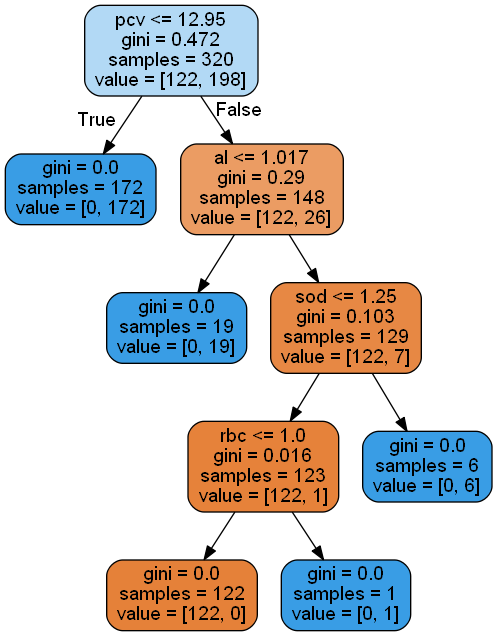

In [28]:
dot_data = StringIO()
export_graphviz(dtree, out_file = dot_data,feature_names = features,filled = True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())


In [29]:
log_entry = pd.DataFrame([['ANN', .65, model.history['val_loss'][-1]]], columns=log_cols)
log = log.append(log_entry)

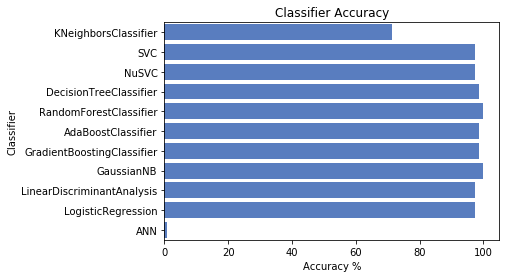

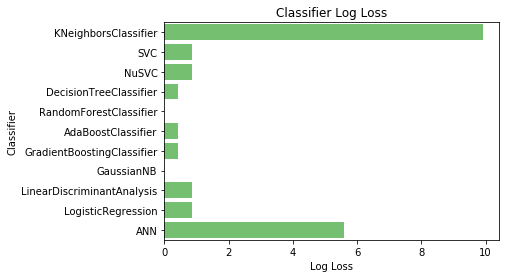

In [30]:
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()
